<Figure size 1000x600 with 0 Axes>

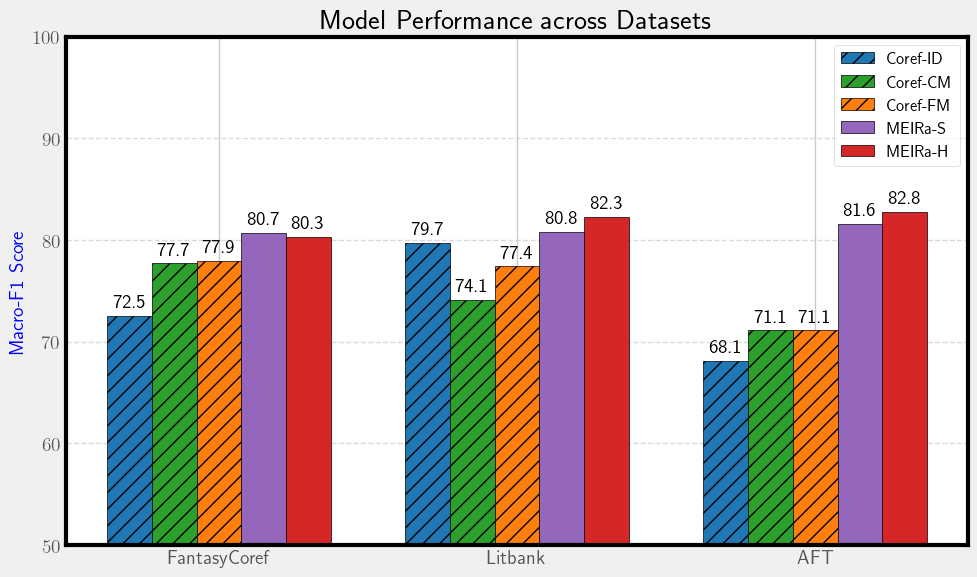

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Set Matplotlib Parameters
plt.style.use('fivethirtyeight')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=14)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Setting up the plot
plt.figure(figsize=(10, 6))
# sns.set_theme(style="darkgrid")

# Data for the plot
data = {
    'Dataset': ['FantasyCoref'] * 5 + ['Litbank'] * 5 + ['AFT'] * 5,
    'Model': ['Coref-ID', 'Coref-CM', 'Coref-FM', 'MEIRa-S', 'MEIRa-H'] * 3,
    'Macro-F1': [72.5, 77.7, 77.9, 80.7, 80.3, 79.7, 74.1, 77.4, 80.8, 82.3, 68.1, 71.1, 71.1, 81.6, 82.8]
}
model_type_vs_model = {
    'Coref-ID': 'Coref-Baseline',
    'Coref-CM': 'Coref-Baseline',
    'Coref-FM': 'Coref-Baseline',
    'MEIRa-S': 'MEIRa models',
    'MEIRa-H': 'MEIRa models'
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Unique datasets and models for plotting
datasets = df['Dataset'].unique()
models = df['Model'].unique()

# Defining colors for each model (same as palette from seaborn example)
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']

# Setting the figure size
plt.figure(figsize=(10, 6))

# Define bar width and bar positions
bar_width = 0.15
index = np.arange(len(datasets))

# Plotting each model's bar in each dataset
for i, model in enumerate(models):
    model_data = df[df['Model'] == model]
    dataset_means = [model_data[model_data['Dataset'] == dataset]['Macro-F1'].values[0] for dataset in datasets]
    hatch = "//" if model_type_vs_model[model] == "Coref-Baseline" else ""
    plt.bar(index + i * bar_width, dataset_means, bar_width, label=model, color=colors[i], hatch=hatch, edgecolor='black')
    ## Add value on top of the bar
    for j, value in enumerate(dataset_means):
        plt.text(index[j] + i * bar_width, value + 0.5, str(value), ha='center', va='bottom')

# Adding labels and title
plt.title('Model Performance across Datasets')
plt.ylabel('Macro-F1 Score')
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), datasets)

# Add a grid for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set minimum and maximum values for y-axis
plt.ylim(50, 100)

# Adding a legend
plt.legend(title='Model')

## Shift position of legend
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Shift position of legend slightly to left
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


### Hide certain columns

<Figure size 1000x600 with 0 Axes>

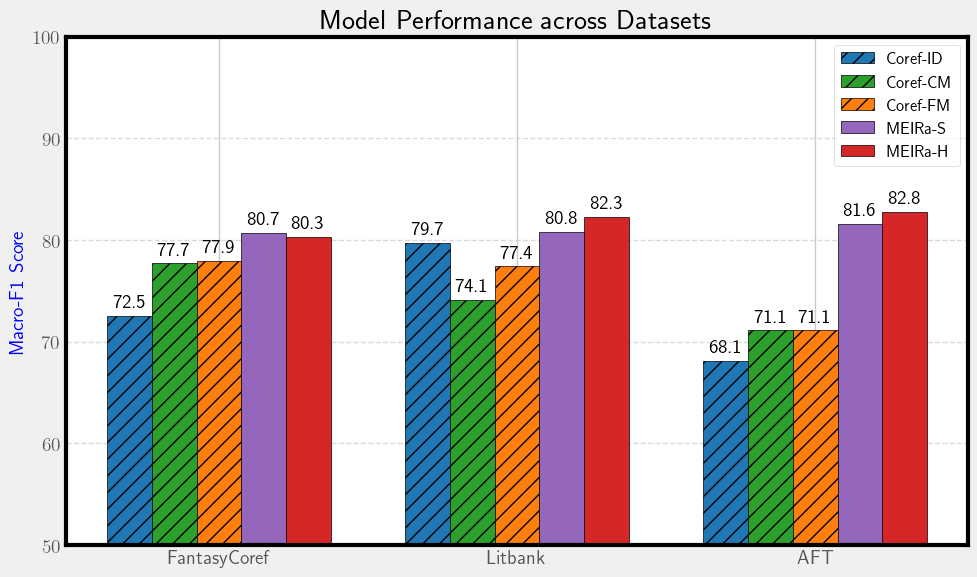

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib Parameters
plt.style.use('fivethirtyeight')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=14)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Setting up the plot
plt.figure(figsize=(10, 6))
# sns.set_theme(style="darkgrid")

# Data for the plot
data = {
    'Dataset': ['FantasyCoref'] * 5 + ['Litbank'] * 5 + ['AFT'] * 5,
    'Model': ['Coref-ID', 'Coref-CM', 'Coref-FM', 'MEIRa-S', 'MEIRa-H'] * 3,
    'Macro-F1': [72.5, 77.7, 77.9, 80.7, 80.3, 79.7, 74.1, 77.4, 80.8, 82.3, 68.1, 71.1, 71.1, 81.6, 82.8]
}
model_type_vs_model = {
    'Coref-ID': 'Coref-Baseline',
    'Coref-CM': 'Coref-Baseline',
    'Coref-FM': 'Coref-Baseline',
    'MEIRa-S': 'MEIRa models',
    'MEIRa-H': 'MEIRa models'
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Unique datasets and models for plotting
datasets = df['Dataset'].unique()
models = df['Model'].unique()

# Defining colors for each model (same as palette from seaborn example)
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']

# Setting the figure size
plt.figure(figsize=(10, 6))

# Define bar width and bar positions
bar_width = 0.15
index = np.arange(len(datasets))

hiden_cols = []
# Plotting each model's bar in each dataset
for i, model in enumerate(models):
    model_data = df[df['Model'] == model]
    dataset_means = [model_data[model_data['Dataset'] == dataset]['Macro-F1'].values[0] for dataset in datasets]
    # alpha = [1 if dataset in selected_datasets else 0.0 for dataset in datasets]
    hatch = "//" if model_type_vs_model[model] == "Coref-Baseline" else ""
    bars = plt.bar(index + i * bar_width, dataset_means, bar_width, label=model, color=colors[i], hatch=hatch, edgecolor='black')
    
    for hide in hiden_cols:
        bars[hide].set_alpha(0.0)
    
    ## Add value on top of the bar
    for j, value in enumerate(dataset_means):
        if j in hiden_cols:
            continue
        plt.text(index[j] + i * bar_width, value + 0.5, str(value), ha='center', va='bottom')



# Adding labels and title
plt.title('Model Performance across Datasets')
plt.ylabel('Macro-F1 Score')
if len(hiden_cols) > 0:
    datasets = [dataset if i not in hiden_cols else "" for i, dataset in enumerate(datasets)]
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), datasets)

# Add a grid for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set minimum and maximum values for y-axis
plt.ylim(50, 100)

# Adding a legend
plt.legend(title='Model')

## Shift position of legend
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Shift position of legend slightly to left
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()